## 판결요지 명사통계, 형태소통계, n그램통계

In [1]:
!pip install pandas

In [2]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd

# CSV 파일 경로
csv_file_path = r'C:\Users\82102\Downloads\새 폴더 (2)\lawService_jh.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)

df = df[df.apply(lambda row: row.astype(str).str.contains('상속').any(), axis=1)]

# 불러온 데이터 확인
print(df.head())

    판례정보일련번호           사건번호  선고           판결유형  \
21    206625    85다카451,452  선고             판결   
40    206592         84누716  선고             판결   
45    206633  85다카644, 8645  선고             판결   
52    206632         85누208  선고             판결   
75     76241          85나14  선고  제14민사부판결 : 상고   

                                                 판시사항  \
21  가. 공유자의 1인이 공유물중 일부를 특정하여서 한 증여의 효력<br/>나. 부동산...   
40   상속재산가액의 평가방법을 정한 구 상속세법 (1981.12.31 법률 제3474호...   
45   아무런 논리적 과정의 설시 없이 단순히 믿을 수 없다든가, 믿지 않는다는 표현만에...   
52   경영권과 함께 회사 총발행주식을 양도하는 경우, 그 거래가액을 주식의 시가로 볼 ...   
75                      회사정리절차 개시결정이 시효중단사유인지 여부<br/>   

                                                 판결요지  \
21  가. 공유자의 1인이 공유물중 일부를 특정하여 타인에게 증여하였다면 이는 특단의 사...   
40  구 상속세법(1981.12.31 법률 제3474호로 개정되기 전의 것) 제9조 제1...   
45   자유심증주의에 의한 민사소송체계에 있어서 그 증거판단에 관하여 판결이유에 일일이 ...   
52   일반적으로 주식의 양도에 경영난의 지배를 수반하는 경우는 이례적이므로 이와 같은 ...   
75  시효취득의 요건인 점유는 권리와는 관계없이 목적물에 대한 현실적 지배상태에 의하여 ...   

             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 21 to 20074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례정보일련번호  1439 non-null   int64 
 1   사건번호      1439 non-null   object
 2   선고        1439 non-null   object
 3   판결유형      1439 non-null   object
 4   판시사항      1412 non-null   object
 5   판결요지      1415 non-null   object
 6   참조조문      1338 non-null   object
 7   참조판례      547 non-null    object
 8   판례내용      1439 non-null   object
dtypes: int64(1), object(8)
memory usage: 112.4+ KB


### 판시사항 길이분포확인

Text(0, 0.5, '빈도 수')

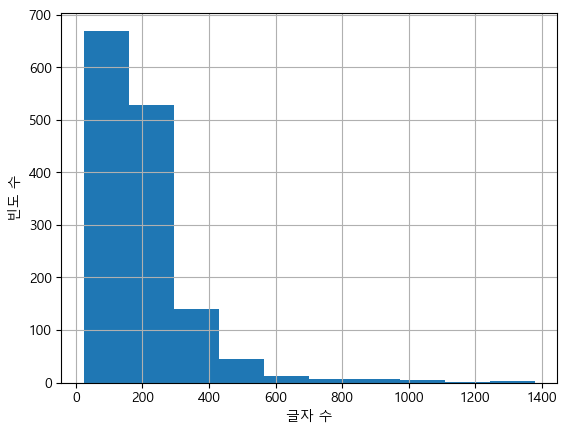

In [5]:
#판시사항의 글자 수 히스토그램
ax = df['판결요지'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

### 토큰수분포

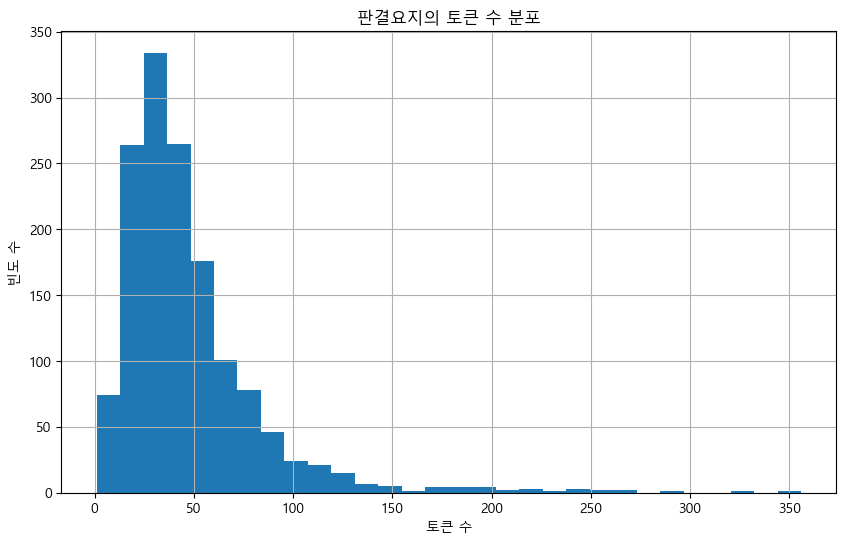

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 결측값을 빈 문자열로 채움
df['판결요지'] = df['판결요지'].fillna('없음')

# 문자열을 공백으로 분할하고, 각 리스트의 길이를 계산
token_counts = df['판결요지'].str.split(' ').map(len)

# 히스토그램 그리기
ax = token_counts.hist(bins=30, figsize=(10,6))
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')
ax.set_title('판결요지의 토큰 수 분포')
plt.show()

### 명사분포

In [7]:
#기호제거
data_list = df['판결요지']
data_list = [text.replace('\r', '').replace('\n', '').replace('<br/>', '').strip() for text in data_list]
data_list

['가. 공유자의 1인이 공유물중 일부를 특정하여 타인에게 증여하였다면 이는 특단의 사정이 없는 한 권한없는 자의 처분행위에 지나지 않는다.나. 원고와 소외 갑이 부동산의 특정부분을 각 증여받아 공동명의로 등기를 마쳤다면 원고와 위 갑은 소유하는 특정부분에 대하여 서로 공유지분등기명의를 신탁한 관계에 있을 뿐이므로 자기소유부분에 대하여 지분의 명의신탁해지를 원인으로 한 지분이전등기를 청구함은 모르되 공유물의 분할청구를 할 수는 없다.',
 '구 상속세법(1981.12.31 법률 제3474호로 개정되기 전의 것) 제9조 제1항 본문, 같은법시행령(1981.12.31 대통령령 제10667호로 개정되기 전의 것) 제5조 제1항의 규정의 취지는 상속재산의 가액은 상속개시 당시의 시가에 의하여 산정함을 원칙으로 하되 시가산정이 어려운 때에 한하여 보충적인 방법으로 위 시행령 제5조 제2항 내지 제5항에 규정된 방법에 의하여 그 가액을 평가할 수 있다는 뜻이다.',
 '자유심증주의에 의한 민사소송체계에 있어서 그 증거판단에 관하여 판결이유에 일일이 이를 밝힐 것까지는 필요로 하지 않는다고 하더라도 가치판단이 논리적, 합리적으로 공정하게 이루어졌다는 보장은 판결이유에 밝혀진 사유만에 의하여 객관화되는 것이므로 가치판단의 논리적 과정을 수긍할 수 있는 최소한의 한도 내에서라도 판결에 밝혀져야 할 것인바, 법원의 증거의 취사선택이라는 증거의 가치판단에 아무런 논리적 과정의 설시 없이 단순히 믿을 수 없다든가 믿지 않는다는 표현만에 의하여 그 가치판단의 결과를 판시하는 것은 설사, 법령위반을 초래하지 않는다고 하더라도 심히 부당하다.',
 '일반적으로 주식의 양도에 경영난의 지배를 수반하는 경우는 이례적이므로 이와 같은 이례에 속하는 회사의 경영권을 합쳐서 그 회사 총발행주식을 양도하는 주식의 거래가격은 주식만을 양도하는 정상적인 주식양도에 있어서의 객관적인 교환가치를 반영하는 일반적인 시가로 볼 수 없다.',
 '시효취득의 요건인 점유는 권리와는 관계없이 목적물에 대한 현실적

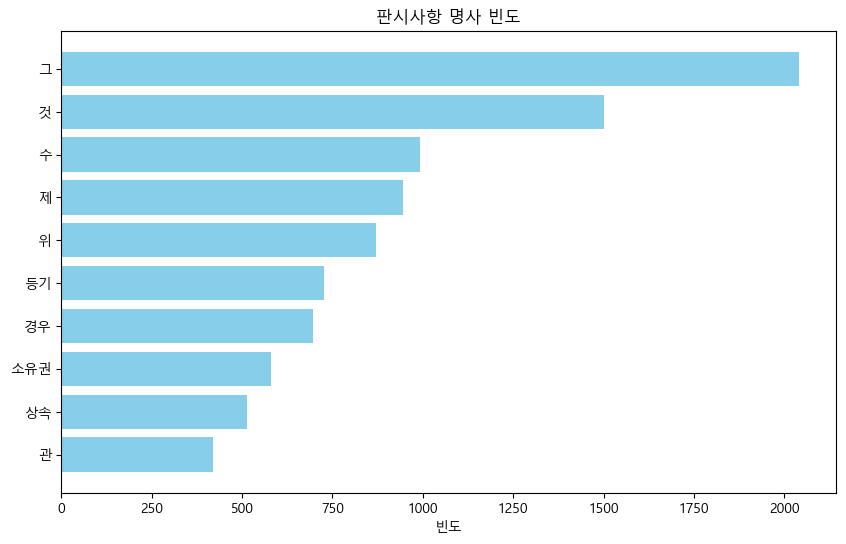

In [8]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt

#명사추출
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))


# 명사를 리스트로 결합
all_nouns = ' '.join(docs_list)

# 명사 빈도 세기
noun_counts = Counter(all_nouns.split())

# 데이터프레임으로 변환
df_noun_counts = pd.DataFrame(noun_counts.items(), columns=['noun', 'count'])
df_noun_counts = df_noun_counts.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts['noun'][:10], df_noun_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판시사항 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

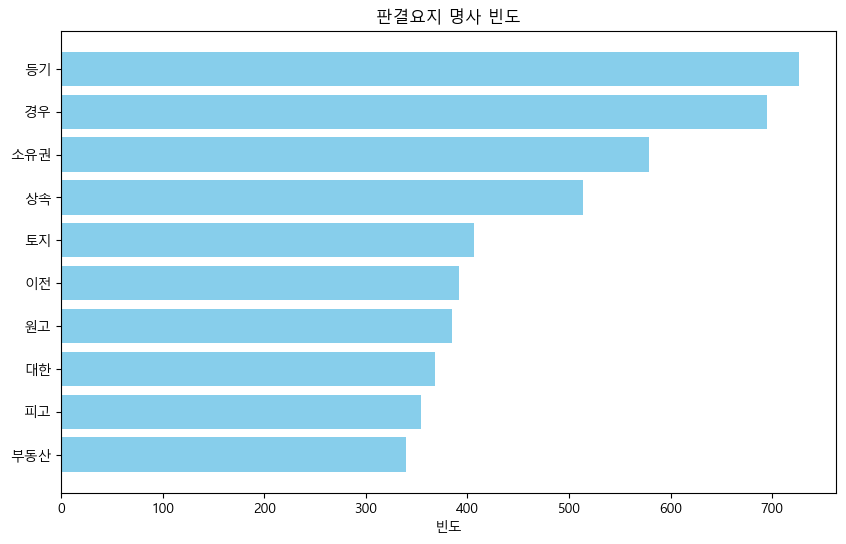

In [9]:
#2글자이상 명사비교

#명사추출
docs_list2 =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    filter_nouns = [noun for noun in nouns if len(noun) > 1]
    docs_list2.append(' '.join(filter_nouns))


# 명사를 리스트로 결합
all_nouns2 = ' '.join(docs_list2)

# 명사 빈도 세기
noun_counts2 = Counter(all_nouns2.split())

# 데이터프레임으로 변환
df_noun_counts2 = pd.DataFrame(noun_counts2.items(), columns=['noun', 'count'])
df_noun_counts2 = df_noun_counts2.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts2['noun'][:10], df_noun_counts2['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판결요지 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

### 형태소 분포

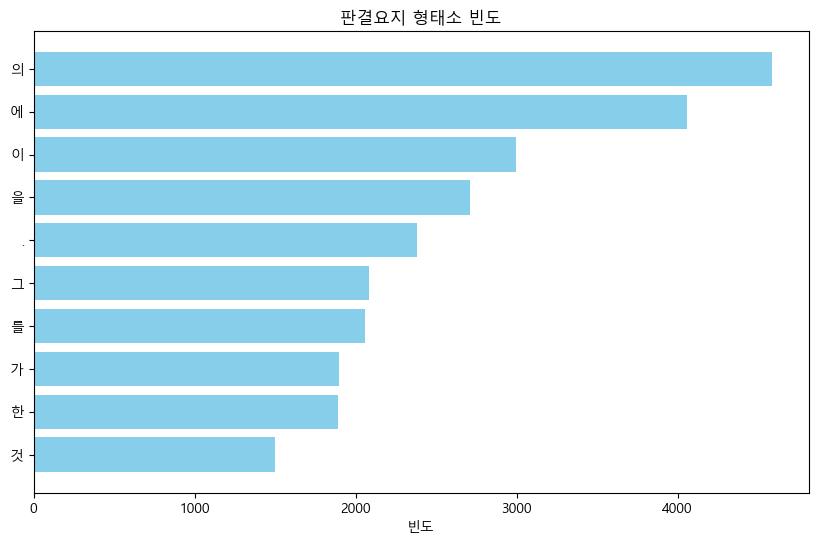

In [10]:
# 형태소 분석
docs_list = []
okt = Okt()
for text in data_list:
    morphemes = okt.morphs(text)  # 모든 형태소 추출
    docs_list.append(' '.join(morphemes))

# 형태소 문자열로 결합
all_morphemes = ' '.join(docs_list)

# 형태소 빈도 세기
morpheme_counts = Counter(all_morphemes.split())

# 데이터프레임으로 변환
df_morpheme_counts = pd.DataFrame(morpheme_counts.items(), columns=['morpheme', 'count'])
df_morpheme_counts = df_morpheme_counts.sort_values(by='count', ascending=False)


# 빈도 시각화 (상위 10개 형태소)
plt.figure(figsize=(10, 6))
plt.barh(df_morpheme_counts['morpheme'][:10], df_morpheme_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판결요지 형태소 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

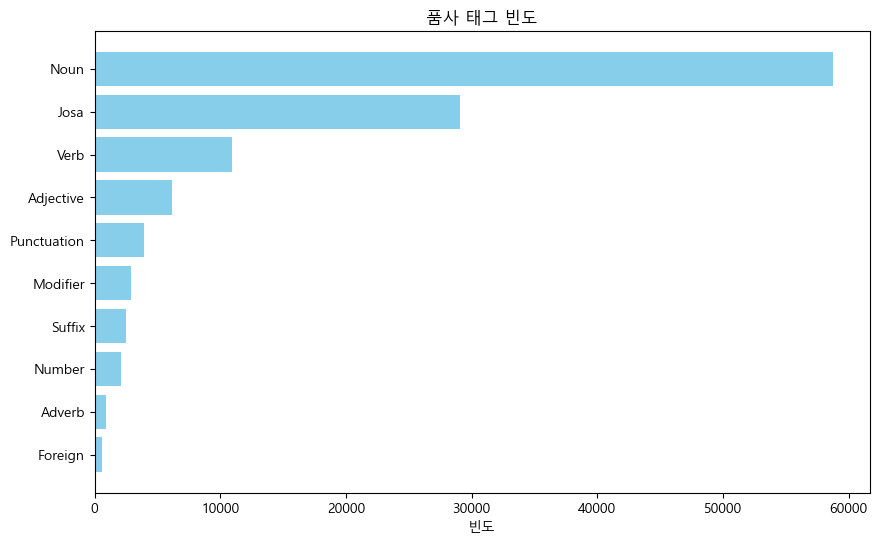

In [11]:
#형태소 품사태그확인

tag_list = []
okt = Okt()
for text in data_list:
    pos_tags = okt.pos(text)
    tags = [tag for _, tag in pos_tags]
    tag_list.extend(tags)

# 품사 태그 빈도 세기
tag_counts = Counter(tag_list)

# 데이터프레임으로 변환
df_tag_counts = pd.DataFrame(tag_counts.items(), columns=['tag', 'count'])
df_tag_counts = df_tag_counts.sort_values(by='count', ascending=False)

# 빈도 시각화 (상위 10개 품사 태그)
plt.figure(figsize=(10, 6))
plt.barh(df_tag_counts['tag'][:10], df_tag_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('품사 태그 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

### N-gram

In [12]:
#위에 명사추출이랑 같음
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#1-gram
vect = CountVectorizer() 
dtm = vect.fit_transform(docs_list).toarray()
vocab = vect.get_feature_names_out()
df_1gram = pd.DataFrame(dtm, columns=vocab)

#2-gram
vect_2gram = CountVectorizer(ngram_range=(2, 2))
dtm_2gram = vect_2gram.fit_transform(docs_list).toarray()
vocab_2gram = vect_2gram.get_feature_names_out()
df_2gram = pd.DataFrame(dtm_2gram, columns=vocab_2gram)

#3-gram
vect_3gram = CountVectorizer(ngram_range=(3, 3))
dtm_3gram = vect_3gram.fit_transform(docs_list).toarray()
vocab_3gram = vect_3gram.get_feature_names_out()
df_3gram = pd.DataFrame(dtm_3gram, columns=vocab_3gram)

print("1-gram")
print(df_1gram)

print("2-gram")
print(df_2gram)

print("3-gram")
print(df_3gram)

1-gram
      가가  가격  가계  가공  가공업  가구  가능  가능성  가다가  가담  ...  휴대  휴식  흑백  흔적  흠결  흡수  \
0      0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
1      0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
2      0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
3      0   1   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
4      0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
...   ..  ..  ..  ..  ...  ..  ..  ...  ...  ..  ...  ..  ..  ..  ..  ..  ..   
1434   0   0   0   0    0   1   0    0    0   0  ...   0   0   0   0   0   0   
1435   0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
1436   0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
1437   0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   
1438   0   0   0   0    0   0   0    0    0   0  ...   0   0   0   0   0   0   

      흥농  희극  희망  희생  
0      0 

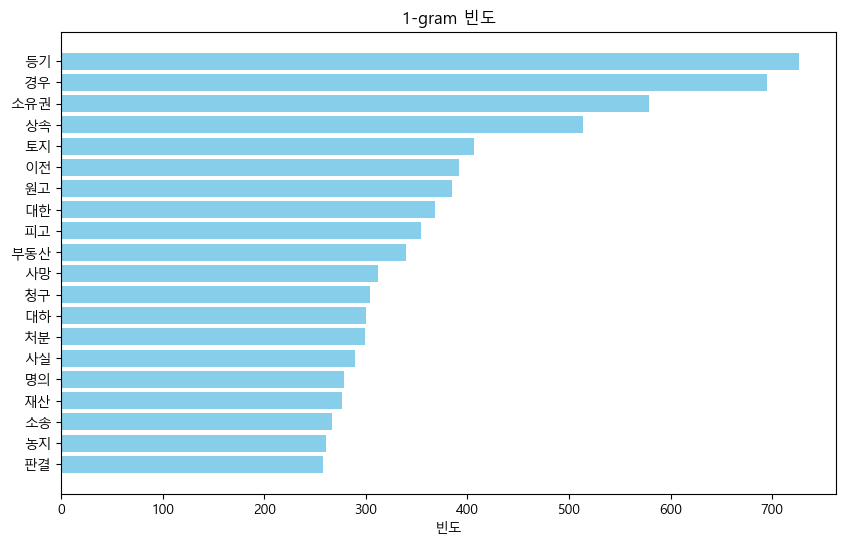

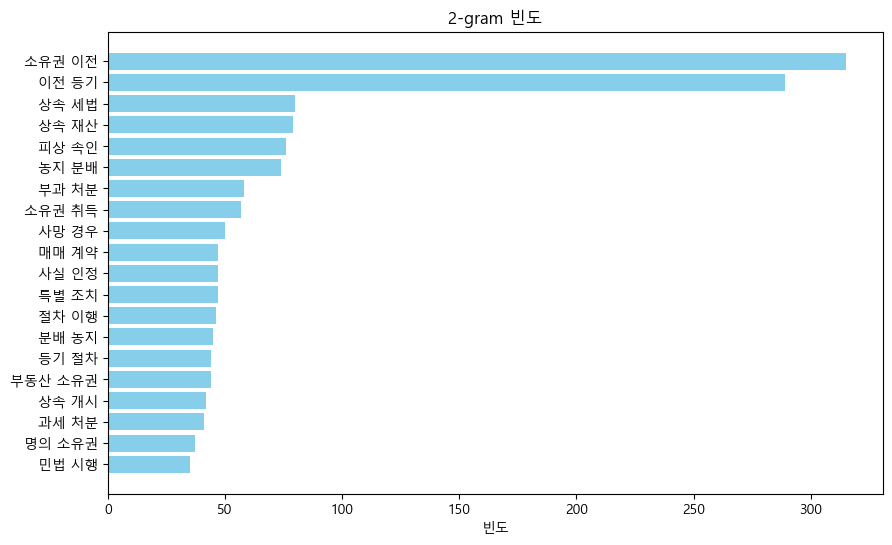

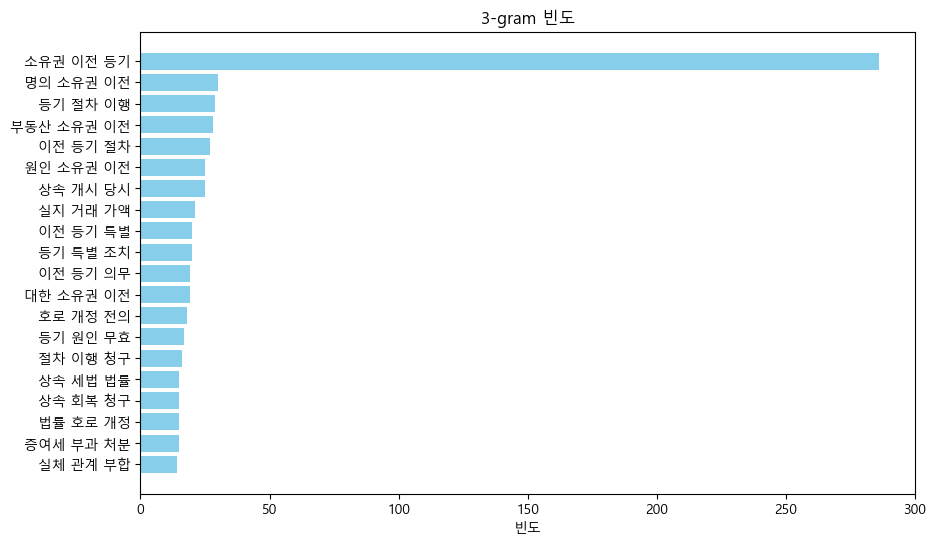

In [14]:
# 빈도수 시각화 함수
def plot_top_n(df, title, n=None):
    # 각 n-gram의 빈도 계산
    freq = df.sum().sort_values(ascending=False).head(n)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(freq.index, freq.values, color='skyblue')
    plt.xlabel('빈도')
    plt.title(title)
    plt.gca().invert_yaxis()  # 빈도순으로
    plt.show()

# 상위 20개 빈도 시각화
plot_top_n(df_1gram, '1-gram 빈도',20)
plot_top_n(df_2gram, '2-gram 빈도',20)
plot_top_n(df_3gram, '3-gram 빈도',20)

In [2]:
! pip install pandas

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### TF-IDF, 워크클라우드(문서의 핵심단어)

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt

#위에 명사추출이랑 같음
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))

: 

In [ ]:
#TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=vocab)
tfidf = tfidfv.fit_transform(docs_list).toarray()
pd.DataFrame(tfidf, columns=vocab)

In [17]:
#TF-IDF중요단어추출

import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
topics =[]
n_top = 10
for line in tfidf_order:
  topic = [vocab[x] for x in line[:n_top]]
  topics.append(topic)
df = pd.DataFrame(topics)
df

,0,1,2,3,4,5,6,7,8,9
0,공유,특정,부분,자의,증여,등기,유부,명의,원고,청구
1,호로,개정,전의,가액,방법,상속,본문,시행,규정,정이
2,가치판단,논리,증거,판결이유,과정,체계,취사,일일이,표현,최소한
3,주식,양도,이례,경영,일반,회사,난의,반영,교환가치,정상
4,상태,점유,지배,시효,회사,사유,파괴,종래,취득,자주
...,...,...,...,...,...,...,...,...,...,...
1434,호주,남자,승계,여식,고래,치산,가독,설령,가구,의무
1435,취하,듯이,오기,변론조서,전연,하등,현저,당초,의사표시,근거
1436,적법,계약,상속인,매매,이천,조항,하등,증서,타당,경유
1437,어업권,군정,면허,법령,허가,취체,전성은,어업,신규,유관


In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_from_tfidf(tfidf, vocab):
    # 단어별 TF-IDF 값을 저장할 딕셔너리
    word_freq = {}
    
    # 모든 문서의 TF-IDF 값을 합산
    for i in range(tfidf.shape[0]):
        for j in range(tfidf.shape[1]):
            if tfidf[i, j] > 0:  # TF-IDF 값이 0보다 클 때만
                word = vocab[j]  # 단어
                if word in word_freq:
                    word_freq[word] += tfidf[i, j]  # 기존 값에 추가
                else:
                    word_freq[word] = tfidf[i, j]  # 새로 추가
    
    # 워드클라우드 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
                    width=800,
                    height=400,
                    background_color='white',
                    prefer_horizontal=0.8,
                    random_state=42,
                    colormap='viridis').generate_from_frequencies(word_freq)
    

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('전체 문서의 워드클라우드')
    plt.show()

# 전체 문서에 대한 워드클라우드 시각화
plot_wordcloud_from_tfidf(tfidf, vocab)

ModuleNotFoundError: No module named 'wordcloud'

### LDA

In [51]:
from konlpy.tag import Okt

docs_list =[]
tdoc_list = []

for text in data_list:
    morp = konlpy.tag.Okt().nouns(text)
    morp = [x for x in morp if len(x) > 1]
    tdoc_list.append(morp)
    docs_list.append(' '.join(morp))

print(docs_list)
print(tdoc_list)

['공유 자의 유물 일부 타인 증여 특단 사정 권한 자의 처분 행위 원고 소외 부동산 특정 부분 증여 명의 등기 원고 소유 특정 부분 대하 서로 유지 등기 명의 신탁 관계 자기 유부 대하 명의신탁 원인 등기 청구 공유 물의 분할 청구', '상속 세법 법률 호로 개정 전의 본문 시행 대통령령 호로 개정 전의 항의 규정 취지 상속 재산 가액 상속 개시 당시 시가 산정 원칙 가산 정이 보충 방법 시행 내지 규정 방법 가액 평가', '자유 심증 주의 민사소송 체계 증거 판단 판결이유 일일이 필요 가치판단 논리 합리 보장 판결이유 사유 객관 것이므 가치판단 논리 과정 수긍 최소한 한도 판결 법원 증거 취사 선택 증거 가치판단 논리 과정 표현 가치판단 결과 설사 법령 위반 초래', '일반 주식 양도 경영 난의 지배 수반 경우 이례 이례 회사 경영 회사 발행 주식 양도 주식 거래 가격 주식 양도 정상 주식 양도 어서 객관 교환가치 반영 일반 시가', '시효 취득 요건 점유 권리 목적 대한 현실 지배 상태 시효 취득 기간 진행 중단 종래 점유 사유 상태 계속 파괴 인정 사유 회사 정리 결정 회사 소유 부동산 대한 자주 점유 사실 지배 상태 이유', '주식 수인 주식 양도인 남편 누나 남편 동생 라면 수인 양도인 친족 시누이 배우자 이내 친족 상속 세법 시행 호가 규정 친족 관계 특별 관계 해당', '피고 명의 소유권보존등기 등기 자신 소유권 장함 원고 소유권 경우 원고 소유권 존부 즉시 확정 이익 원고 피고 상대로 명의 소유권보존등기 등기 말소 제기 경우 등기 목적 국가 상대로 소유권 확인 별도 피고 상대로 소유권 확인 이익', '부동산 소유 명의 신탁 자가 부동산 다른 사람 양도 소유권 이전 등기 탁자 다시 수인 소유권 탁자 이전 사정 탁자 탁자 대한 신탁 소유권 이전 등기 의무 이행불능 상태', '명의신탁 신탁법 신탁 명의신탁 사실 신탁법 규정 등기 등록 상속 세법 법률 호로 개정 전의 규정 증여 의제', '부동산 소유권 이전 등기 특별 조치 항의 규정 취지 보아 소정 

In [52]:
#TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer()
tfidf = tfidfv.fit_transform(docs_list).toarray()
pd.DataFrame(tfidf, columns=vocab)

,가가,가격,가계,가공,가공업,가구,가능,가능성,가다가,가담,...,휴대,휴식,흑백,흔적,흠결,흡수,흥농,희극,희망,희생
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.125298,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0.0,0.000000,0.0,0.0,0.0,0.222133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#TF-IDF중요단어추출

import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
topics =[]
n_top = 10
for line in tfidf_order:
  topic = [vocab[x] for x in line[:n_top]]
  topics.append(topic)
df = pd.DataFrame(topics)
df

,0,1,2,3,4,5,6,7,8,9
0,공유,특정,부분,자의,증여,등기,유부,명의,원고,청구
1,호로,개정,전의,가액,방법,상속,본문,시행,규정,정이
2,가치판단,논리,증거,판결이유,과정,체계,취사,일일이,표현,최소한
3,주식,양도,이례,경영,일반,회사,난의,반영,교환가치,정상
4,상태,점유,지배,시효,회사,사유,파괴,종래,취득,자주
...,...,...,...,...,...,...,...,...,...,...
1434,호주,남자,승계,여식,고래,치산,가독,설령,가구,의무
1435,취하,듯이,오기,변론조서,전연,하등,현저,당초,의사표시,근거
1436,적법,계약,상속인,매매,이천,조항,하등,증서,타당,경유
1437,어업권,군정,면허,법령,허가,취체,전성은,어업,신규,유관


In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel

In [55]:
import gensim
g_dictionary = gensim.corpora.Dictionary(tdoc_list)
g_corpus = [g_dictionary.doc2bow(text) for text in tdoc_list]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=4, passes=15)
ldamodel.print_topics()

[(0,
  '0.014*"농지" + 0.012*"매매" + 0.012*"경우" + 0.012*"계약" + 0.008*"분배" + 0.008*"원고" + 0.007*"취득" + 0.007*"피고" + 0.006*"사실" + 0.006*"토지"'),
 (1,
  '0.020*"토지" + 0.015*"점유" + 0.014*"경우" + 0.013*"농지" + 0.010*"규정" + 0.010*"분배" + 0.009*"소유자" + 0.009*"소유" + 0.009*"대한" + 0.008*"시행"'),
 (2,
  '0.017*"처분" + 0.013*"상속" + 0.012*"경우" + 0.012*"가액" + 0.009*"과세" + 0.009*"양도" + 0.007*"취득" + 0.007*"부과" + 0.006*"세법" + 0.006*"대하"'),
 (3,
  '0.036*"등기" + 0.025*"소유권" + 0.019*"이전" + 0.017*"경우" + 0.015*"상속" + 0.013*"소송" + 0.013*"부동산" + 0.013*"명의" + 0.012*"판결" + 0.011*"피고"')]

In [56]:
def format_topics_sentences(ldamodel=None, g_corpus=g_corpus, tokens=tdoc_list):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[g_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df =pd.concat([sent_topics_df, pd.DataFrame([[topic_num, round(prop_topic, 3), topic_keywords],])], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['주요토픽', '토픽 기여도', '주요 토픽 키워드']
    contents = pd.Series(tdoc_list)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, g_corpus=g_corpus, tokens=tdoc_list)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['문서번호', '주요토픽', '토픽 기여도', '키워드', '토큰']
df_dominant_topic

,문서번호,주요토픽,토픽 기여도,키워드,토큰
0,0,3,0.982,"등기, 소유권, 이전, 경우, 상속, 소송, 부동산, 명의, 판결, 피고","[공유, 자의, 유물, 일부, 타인, 증여, 특단, 사정, 권한, 자의, 처분, 행위, 원고, 소외, 부동산, 특정, 부분, 증여, 명의, 등기, 원고, 소유, 특정, 부분..."
1,1,1,0.793,"토지, 점유, 경우, 농지, 규정, 분배, 소유자, 소유, 대한, 시행","[상속, 세법, 법률, 호로, 개정, 전의, 본문, 시행, 대통령령, 호로, 개정, 전의, 항의, 규정, 취지, 상속, 재산, 가액, 상속, 개시, 당시, 시가, 산정, 원..."
2,2,2,0.980,"처분, 상속, 경우, 가액, 과세, 양도, 취득, 부과, 세법, 대하","[자유, 심증, 주의, 민사소송, 체계, 증거, 판단, 판결이유, 일일이, 필요, 가치판단, 논리, 합리, 보장, 판결이유, 사유, 객관, 것이므, 가치판단, 논리, 과정,..."
3,3,2,0.975,"처분, 상속, 경우, 가액, 과세, 양도, 취득, 부과, 세법, 대하","[일반, 주식, 양도, 경영, 난의, 지배, 수반, 경우, 이례, 이례, 회사, 경영, 회사, 발행, 주식, 양도, 주식, 거래, 가격, 주식, 양도, 정상, 주식, 양도,..."
4,4,0,0.702,"농지, 매매, 경우, 계약, 분배, 원고, 취득, 피고, 사실, 토지","[시효, 취득, 요건, 점유, 권리, 목적, 대한, 현실, 지배, 상태, 시효, 취득, 기간, 진행, 중단, 종래, 점유, 사유, 상태, 계속, 파괴, 인정, 사유, 회사,..."
...,...,...,...,...,...
1434,1434,3,0.975,"등기, 소유권, 이전, 경우, 상속, 소송, 부동산, 명의, 판결, 피고","[호주, 사망, 가독, 상속, 남자, 경우, 여식, 호주, 상속권, 가구, 남자, 상속인, 호주, 상속인, 피상, 속인, 권리, 의무, 승계, 고래, 관습, 설령, 치산, ..."
1435,1435,3,0.430,"등기, 소유권, 이전, 경우, 상속, 소송, 부동산, 명의, 판결, 피고","[소송, 취하, 의사표시, 당초, 존재, 불구, 변론조서, 하등, 근거, 취하, 듯이, 오기, 현저, 취하, 효력, 전연, 발생]"
1436,1436,3,0.689,"등기, 소유권, 이전, 경우, 상속, 소송, 부동산, 명의, 판결, 피고","[매매, 계약, 체결, 사망, 상속인, 사이, 대금, 지급, 계약, 조항, 이천, 경우, 등기, 신청, 이행, 상속인, 명의, 작성, 매도, 증서, 적법, 해석, 타당, 적..."
1437,1437,2,0.653,"처분, 상속, 경우, 가액, 과세, 양도, 취득, 부과, 세법, 대하","[종전, 어업권, 군정, 법령, 전부, 소멸, 군정, 법령, 어업, 취체, 규칙, 신규, 면허, 허가, 어업권, 상속, 양도, 기타, 전성은, 일종, 재산권, 음으로, 면허..."


In [57]:
pd.options.display.max_colwidth = 100
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('주요토픽')
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['토픽 기여도'], ascending=False).head(1)], axis=0)
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['토픽번호', "토픽 기여도", "키워드", "관련 토큰"]
sent_topics_sorteddf_mallet.head(10)

,토픽번호,토픽 기여도,키워드,관련 토큰
0,0,0.996,"농지, 매매, 경우, 계약, 분배, 원고, 취득, 피고, 사실, 토지","[민법, 규정, 호주, 가족, 사망, 경우, 적용, 호주, 가족, 사망, 경우, 가족, 상속인, 분묘, 권리, 귀속, 근거, 관습법, 사회, 거듭, 관행, 사회생활, 규범,..."
1,1,0.993,"토지, 점유, 경우, 농지, 규정, 분배, 소유자, 소유, 대한, 시행","[농지개혁법, 시행, 국가, 매수, 농지, 농지개혁, 사업, 정리, 특별, 조치, 시행, 당시, 분배, 토지, 항의, 규정, 국유, 등기, 거나, 확인, 작자, 분배, 농지..."
2,2,0.995,"처분, 상속, 경우, 가액, 과세, 양도, 취득, 부과, 세법, 대하","[과세, 대상, 법률관계, 사실관계, 소득, 행위, 전혀, 사람, 과세, 처분, 하자, 과세, 대상, 법률관계, 사실관계, 대하, 과세, 대상, 오인, 객관, 사정, 경우,..."
3,3,0.996,"등기, 소유권, 이전, 경우, 상속, 소송, 부동산, 명의, 판결, 피고","[부재자, 권한, 원고, 사이, 부재자, 소유, 부동산, 매매, 계약, 체결, 소외, 부재자, 재산관리인, 선임, 매매, 계약, 기한, 소유권, 이전, 등기, 자기, 인감증..."
